[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



(a) sex  
(b) number of echidnas  
(c) population of a city  
(d) Time of Day

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat", sep="\\s+")


Part a. Construct a histogram of CO2 emissions.

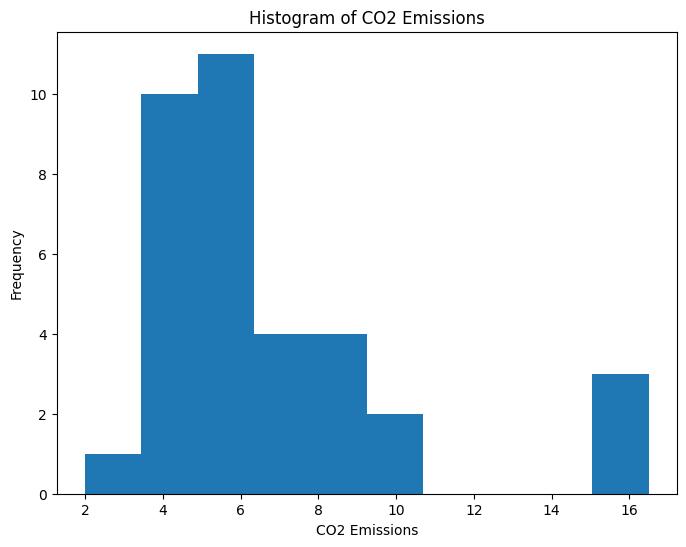

In [96]:
plt.figure(figsize=(8,6))
plt.hist(carbon_west['CO2'])
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [97]:
carbon_west_mean = carbon_west['CO2'].mean()
carbon_west_median = carbon_west['CO2'].median()
carbon_west_std = carbon_west['CO2'].std()

print('Mean: ', carbon_west_mean)
print('Median: ', carbon_west_median)
print('Standard Deviation: ', carbon_west_std)

Mean:  6.717142857142858
Median:  5.9
Standard Deviation:  3.3569493954627134


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [98]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat",sep="\\s+")
murders_no_dc = murders.drop(murders.index[50])

Part a. Find the mean and standard deviation for murders without D.C.

In [99]:
murders_no_dc_mean = murders_no_dc['murder'].mean()
murders_no_dc_std = murders_no_dc['murder'].std()

print('Mean:' , murders_no_dc_mean)
print('Standard Deviation:' , murders_no_dc_std)

Mean: 4.874
Standard Deviation: 2.586291174793806


Part b. Find the five-number  summary without D.C.

In [100]:
murders_no_dc.describe()

,murder
count,50.000000
mean,4.874000
std,2.586291
min,1.000000
25%,2.625000
50%,4.850000
75%,6.175000
max,12.400000


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [109]:
murders_median = murders['murder'].median()

print('The mean is affected more by the outlier than the median because the outlier skews the data')
print('The range is affected more than the IQR')
print('median: ', murders_median)
murders.describe()

The mean is affected more by the outlier than the median because the outlier skews the data
The range is affected more than the IQR
median:  5.0


,murder
count,51.000000
mean,5.252941
std,3.725391
min,1.000000
25%,2.650000
50%,5.000000
75%,6.450000
max,24.200000


**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [102]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat", sep="//s+")
houses.head()

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3


Part a. Construct a scatterplot between square feet and price of a home.

<Axes: title={'center': 'Scatterplot of Price vs. Size'}, xlabel='size', ylabel='price'>

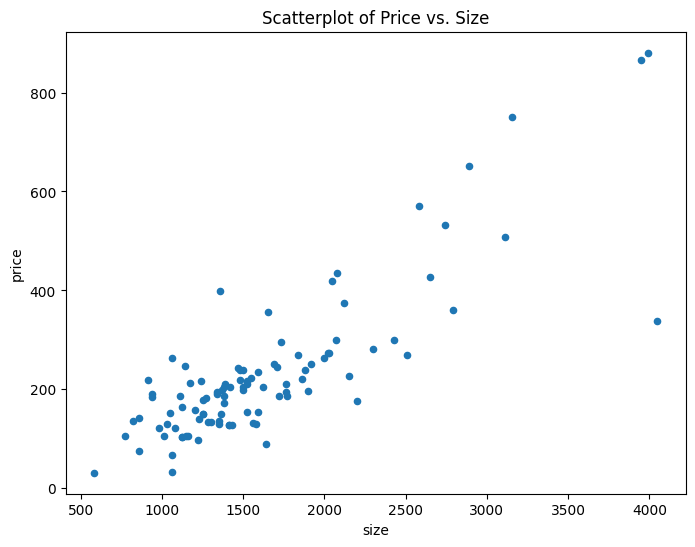

In [103]:
houses.plot.scatter(x='size', y='price', title= "Scatterplot of Price vs. Size", figsize=(8,6))

Part b. Find the correlation between the two variables.

In [104]:
houses[['size', 'price']].corr()

,size,price
size,1.000000,0.833785
price,0.833785,1.000000


Part c. Find and plot the regression line on top of the scatterplot.

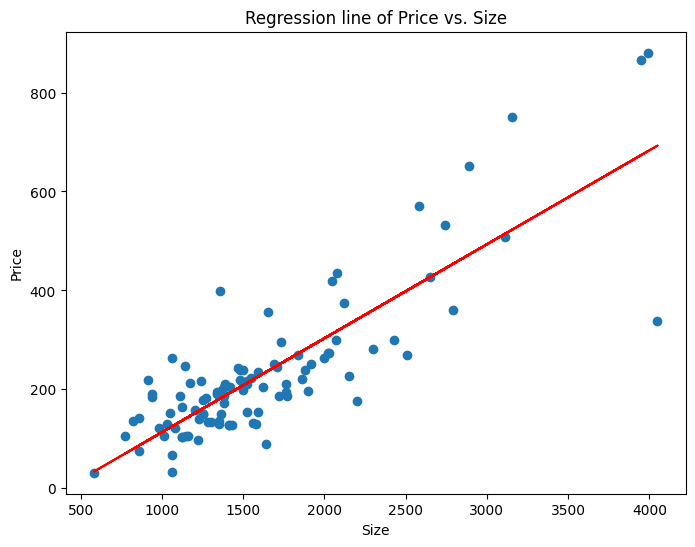

In [105]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = houses[['size']]
y = houses['price']
model.fit(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.title('Regression line of Price vs. Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(X, model.predict(X), color='red')

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

Text(0, 0.5, 'Newness')

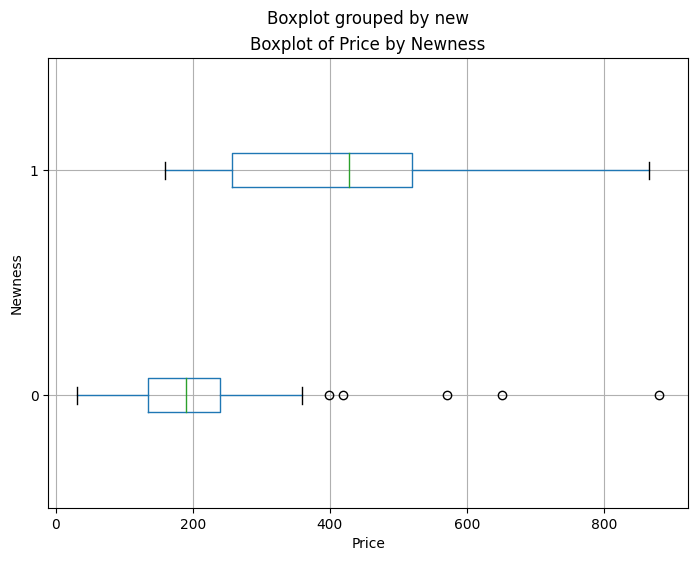

In [106]:
houses.boxplot(column='price', by='new', vert=False, figsize=(8,6))
plt.title('Boxplot of Price by Newness')
plt.xlabel('Price')
plt.ylabel('Newness')

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

There is a positive relationship between size and price as seen by the correlation coefficient and the positive regression line.  
There is also a postive relationship between newness and price, as the entire IQR of the new houses is greater in price than the IQR of the old houses. There are however five outliers in the old houses, and these could be explained by historical value or larger plots.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [107]:
happy = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="//s+")

In [110]:
pd.crosstab(happy['marital'], happy['happiness'])

happiness,1,1 1,1 2,1 3,2,2 1,2 2,2 3,3,3 1,3 2,3 3
marital,,,,,,,,,,,,
fe,348,0,0,0,642,0,0,0,153,0,0,0
fem,0,5,0,0,0,0,0,0,0,0,0,0
mal,0,107,33,56,0,229,114,210,0,33,45,68
male,0,99,0,0,0,0,0,0,0,0,0,0
